In [4]:
import tensorflow as tf

In [148]:
encoding_dims = 32
input_layer = tf.keras.Input(shape=(784,))

In [149]:
dense_1 = tf.keras.layers.Dense(128,activation='relu')(input_layer)
encoded = tf.keras.layers.Dense(encoding_dims,activation='relu')(dense_1)
decoded = tf.keras.layers.Dense(784,activation='sigmoid')(encoded)

In [152]:
autoencoder = tf.keras.Model(input_layer, decoded)

In [153]:
encoder = keras.Model(input_layer, encoded)

In [155]:
encoded_input = keras.Input(shape=(encoding_dims,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [156]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [174]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [160]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [162]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

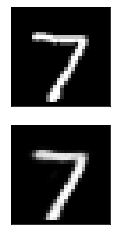

In [204]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 1  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [206]:
import numpy as np
image = tf.io.read_file('5digit.jpg')
image = tf.io.decode_jpeg(image,channels=1)
image = image.numpy().astype('float32') / 255.
image = image.reshape(784)
image = np.expand_dims(image,axis=0)

In [207]:
encoded_img = encoder.predict(image)
decoded_img = decoder.predict(encoded_img)

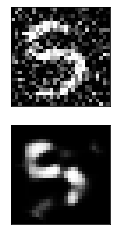

In [208]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 1  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()